### corneal endothelial state space
---
#### 1. formation of corneal endothelial state space with specific markers
#### 2. PCA

In [1]:
# Import Library
import os
from typing import NamedTuple, List, Dict, Tuple, Any

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA

In [2]:
# Set Config
class ScriptConfig(NamedTuple):
    data: str = "./data_1.csv"
    container: str = "./analysis2021june"
    gene: Tuple[str] = (
        "ATP1A1", "ATP1B1", "PITX2",
        "AQP1", "COL8A2", "ITGA3",
        "CA2", "CDH2", "CLRN1",
        "MRGPRX3", "HTR1D", "GRIP1",
        "ZP4", "POU5F1", "SOX2",
        "LIN28A", "NANOG", "MYC",
        "KLF4", "CDH1", "FOXD3"
    )
    kwarg_heatmap: Dict[str,Any] = {
        "cmap": sns.diverging_palette(255, 10, l=50, s=100, n=40, center="dark"),
        "square": True,
        "robust": True,
        "cbar": True,
        "cbar_kws": {"shrink": 0.8}
    }   
    kwarg_savefig: Dict = {
        "facecolor": "white",
        "dpi": 300,
        "bbox_inches": "tight",
        "pad_inches": 0.05
    }
    save_file: bool = False
        
config = ScriptConfig(save_file = True)

In [3]:
# Set dir to save files
os.makedirs(config.container, exist_ok=True)

In [4]:
# Load Data
data_raw = pd.read_csv(config.data, index_col=0).T
for i in range(1, len(data_raw.T)):
    n1 = data_raw.columns[i-1]
    n2 = data_raw.columns[i]
    if n1==n2:
        data_raw.columns.values[i] = f"{data_raw.columns[i]}_2"

In [5]:
# Select genes as the 2 axes
group_of_4 = data_raw.loc[:, config.gene]

In [6]:
group_of_4

GeneSymbol,ATP1A1,ATP1B1,PITX2,AQP1,COL8A2,ITGA3,CA2,CDH2,CLRN1,MRGPRX3,...,GRIP1,ZP4,POU5F1,SOX2,LIN28A,NANOG,MYC,KLF4,CDH1,FOXD3
HCE-group1,9.114125,5.307458,1588.102153,247.887377,122.190931,10.963849,92.095624,1.476763,166.869561,172.118934,...,1.517316,78.948995,0.821862,0.001410,0.445786,1.502303,2.410593,64.359937,8.912162,0.116540
HCE-group2,24.585832,6.858581,1221.184950,123.328584,88.830949,16.256282,81.167091,1.426576,55.852386,233.187460,...,1.894461,66.507125,0.853486,0.001264,0.403638,0.510941,3.529948,100.814916,4.024050,0.104419
HCE-group3,21.710544,7.958521,1352.184219,161.073294,109.156528,12.627556,89.570639,1.483147,149.654661,119.963815,...,2.127601,60.595019,0.971022,0.004979,0.474888,0.597077,4.051584,113.589683,3.302629,0.169028
iPS-1,0.980838,0.987888,2.618531,0.187213,0.174179,1.178248,1.090780,0.880354,0.911224,1.473883,...,0.662127,0.376882,1474.361921,6.261664,423.497605,636.043224,1.666151,0.779962,767.446835,32.341776
iPS-2,1.008025,1.177425,0.652076,0.155095,0.176582,1.139894,0.916775,0.659189,1.491473,0.861624,...,0.622341,0.385058,1862.116990,5.609427,467.118250,836.706597,1.990727,0.501464,923.576721,45.132726
iPS-3,0.885488,1.012261,1.431813,0.152369,0.229170,1.178427,0.903050,0.661435,1.505033,1.088942,...,0.494409,0.338064,1705.141796,4.772133,405.188102,752.561670,1.642693,0.841452,854.173897,40.370093
CECSi -1,0.841194,2.348883,55.407536,29.070218,3.779175,7.517935,12.327629,5.393668,141.191360,1.644100,...,1.257206,6.369774,2.313475,2.000731,0.294893,0.567840,1.927042,2.364575,2.449287,0.283784
CECSi -2,0.970645,1.806552,16.552627,15.516337,3.733721,6.399683,6.931865,4.014567,124.931009,0.831375,...,1.338354,3.007135,1.516350,1.177263,0.829136,0.393615,1.125349,1.019672,0.909043,0.091148
CECSi -3,0.932343,1.999058,29.825524,32.626108,3.750510,7.593373,7.510456,3.730335,52.121981,0.806325,...,1.412494,5.577832,1.852669,0.849428,1.012468,0.612420,0.947458,1.111727,2.263146,0.074835
NCC-1,0.985102,0.748489,0.241431,0.501837,0.584674,0.283216,1.785575,1.229234,0.810029,0.839893,...,1.605782,0.374394,2.324279,3.894844,105.853451,4.044614,0.764702,0.406098,0.834910,5.433760


In [7]:
hce_ips_cecsi = group_of_4.iloc[:9, :]
hce_ips_cecsi

GeneSymbol,ATP1A1,ATP1B1,PITX2,AQP1,COL8A2,ITGA3,CA2,CDH2,CLRN1,MRGPRX3,...,GRIP1,ZP4,POU5F1,SOX2,LIN28A,NANOG,MYC,KLF4,CDH1,FOXD3
HCE-group1,9.114125,5.307458,1588.102153,247.887377,122.190931,10.963849,92.095624,1.476763,166.869561,172.118934,...,1.517316,78.948995,0.821862,0.001410,0.445786,1.502303,2.410593,64.359937,8.912162,0.116540
HCE-group2,24.585832,6.858581,1221.184950,123.328584,88.830949,16.256282,81.167091,1.426576,55.852386,233.187460,...,1.894461,66.507125,0.853486,0.001264,0.403638,0.510941,3.529948,100.814916,4.024050,0.104419
HCE-group3,21.710544,7.958521,1352.184219,161.073294,109.156528,12.627556,89.570639,1.483147,149.654661,119.963815,...,2.127601,60.595019,0.971022,0.004979,0.474888,0.597077,4.051584,113.589683,3.302629,0.169028
iPS-1,0.980838,0.987888,2.618531,0.187213,0.174179,1.178248,1.090780,0.880354,0.911224,1.473883,...,0.662127,0.376882,1474.361921,6.261664,423.497605,636.043224,1.666151,0.779962,767.446835,32.341776
iPS-2,1.008025,1.177425,0.652076,0.155095,0.176582,1.139894,0.916775,0.659189,1.491473,0.861624,...,0.622341,0.385058,1862.116990,5.609427,467.118250,836.706597,1.990727,0.501464,923.576721,45.132726
iPS-3,0.885488,1.012261,1.431813,0.152369,0.229170,1.178427,0.903050,0.661435,1.505033,1.088942,...,0.494409,0.338064,1705.141796,4.772133,405.188102,752.561670,1.642693,0.841452,854.173897,40.370093
CECSi -1,0.841194,2.348883,55.407536,29.070218,3.779175,7.517935,12.327629,5.393668,141.191360,1.644100,...,1.257206,6.369774,2.313475,2.000731,0.294893,0.567840,1.927042,2.364575,2.449287,0.283784
CECSi -2,0.970645,1.806552,16.552627,15.516337,3.733721,6.399683,6.931865,4.014567,124.931009,0.831375,...,1.338354,3.007135,1.516350,1.177263,0.829136,0.393615,1.125349,1.019672,0.909043,0.091148
CECSi -3,0.932343,1.999058,29.825524,32.626108,3.750510,7.593373,7.510456,3.730335,52.121981,0.806325,...,1.412494,5.577832,1.852669,0.849428,1.012468,0.612420,0.947458,1.111727,2.263146,0.074835


In [8]:
df = [hce_ips_cecsi, group_of_4]

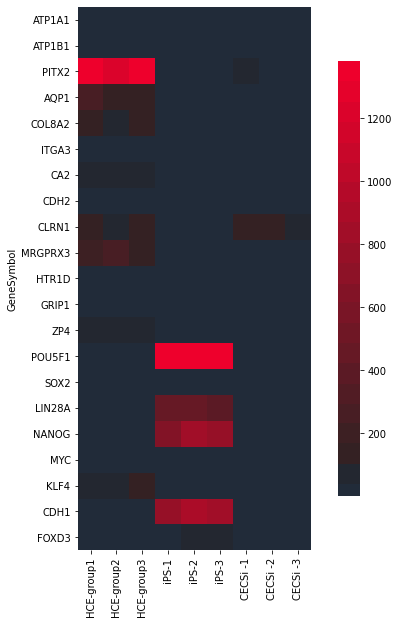

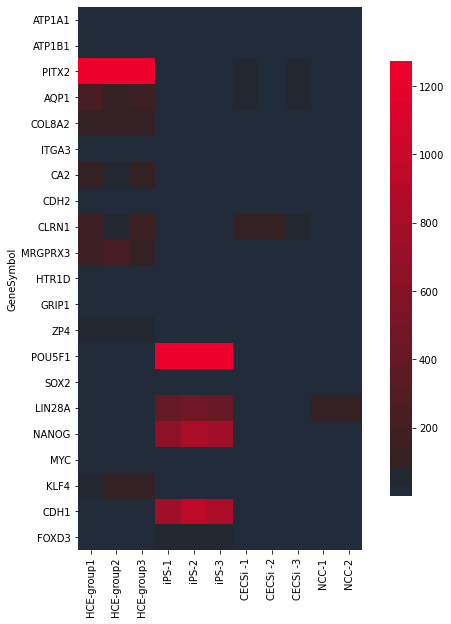

In [9]:
# TPM heatmap
for i, v in enumerate(df):
    plt.figure(figsize=(10, 10))
    sns.heatmap(v.T, center=v.mean().mean(), **config.kwarg_heatmap)
    plt.yticks(rotation=0)
    plt.savefig(f"{config.container}/heatmap_{i+1}.png", **config.kwarg_savefig)

In [10]:
# PCA
model_pca = [PCA(random_state=0) for i in range(len(df))]
df_pca = [
    pd.DataFrame(
        v.fit_transform(df[i]),
        index = df[i].index,
        columns = [f"PC{j+1}" for j in range(min(df[i].shape))]
    ) for i, v in enumerate(model_pca)
]

In [11]:
# Contribution

cont = [
    pd.DataFrame(
        {
            "contribution [%]": v.explained_variance_ratio_ * 100,
            "cummulative contribution [%]": v.explained_variance_ratio_.cumsum() * 100
        },
        index = [pc for pc in df_pca[i]]
    ) for i, v in enumerate(model_pca)
]

In [12]:
accepted_dim = [
    i[i.iloc[:, 1] < 80].shape[0]+1 for i in cont
]
val_pc_cont = [
    [
        cont[i].iloc[j, 0].round(2) for j in range(v)
    ] for i, v in enumerate(accepted_dim)
]

In [13]:
# Save Data as csv.
for i, v in enumerate(df_pca):
    v.iloc[:, :accepted_dim[i]].to_csv(f"{config.container}/pca_data_{i+1}.csv", index = True)

In [14]:
# Save Data as pkl.
for i, v in enumerate(df_pca):
    v.iloc[:, :accepted_dim[i]].to_pickle(f"{config.container}/pca_data_{i+1}.pkl")

In [15]:
eigenvectors = [
    [
        pd.DataFrame(
            model_pca[i].components_[j],
            index = df[i].columns,
            columns = [f'PC{j+1} ({val_pc_cont[i][j]}%)']
        ) for j in range(v)
    ] for i, v in enumerate(accepted_dim)
]

In [16]:
df_ev = pd.concat((pd.concat(eigenvectors[0], axis=1), pd.concat(eigenvectors[1], axis=1)), axis=1)

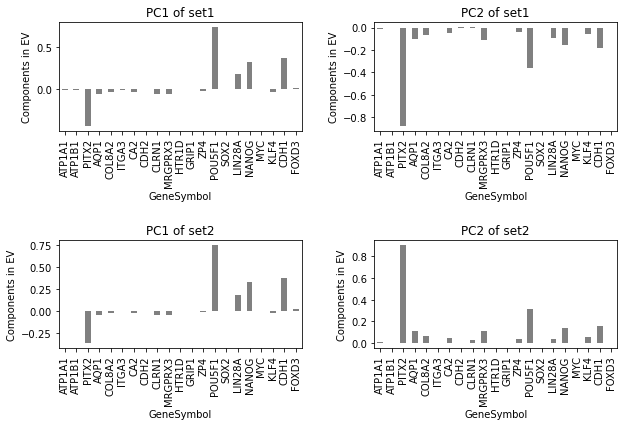

In [17]:
fig, ax = plt.subplots(2, 2, figsize = (10, 6))
plt.subplots_adjust(wspace=0.3, hspace=1)

for i in range(df_ev.shape[1]):
    df_ev.iloc[:, i].plot.bar(ax = ax[i//2, i%2],
                              ylabel = f"Components in EV",
               title = f"PC{i%2+1} of set{i//2+1}",
               color = "gray"
              )

if config.save_file:
    plt.savefig(f"{config.container}/eigenvectors.png",
                **config.kwarg_savefig)

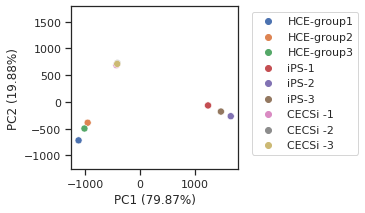

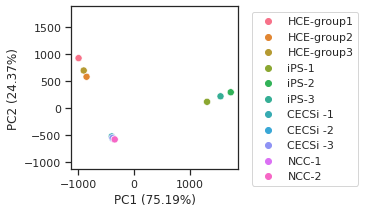

In [18]:
# Plot
sns.set() 
sns.set_style('ticks')

for i, v in enumerate(df_pca):
    fig, ax = plt.subplots(figsize = (3, 3))
    sns.scatterplot(data = v,
                x = v.iloc[:, 0],
                y = v.iloc[:, 1],
                hue = v.index,
                s = 50,
                ax = ax)
    ax.set(xlabel = f"{v.columns[0]} ({val_pc_cont[i][0]}%)",
           ylabel = f"{v.columns[1]} ({val_pc_cont[i][1]}%)"
          );
    ax.set_ylim(ax.get_xlim())
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


    if config.save_file:
        plt.savefig(f"{config.container}/pca_scatter_{i+1}.png",
                    **config.kwarg_savefig)

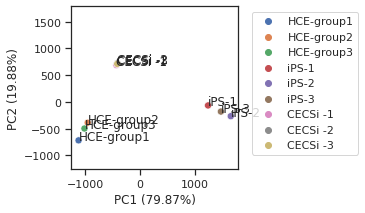

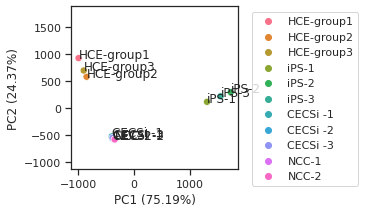

In [19]:
# Plot
sns.set() 
sns.set_style('ticks')

for i, v in enumerate(df_pca):
    fig, ax = plt.subplots(figsize = (3, 3))
    sns.scatterplot(data = v,
                x = v.iloc[:, 0],
                y = v.iloc[:, 1],
                hue = v.index,
                s = 50,
                ax = ax)
    ax.set(xlabel = f"{v.columns[0]} ({val_pc_cont[i][0]}%)",
           ylabel = f"{v.columns[1]} ({val_pc_cont[i][1]}%)"
          );
    ax.set_ylim(ax.get_xlim())
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    for j, w in v.iterrows():
        ax.annotate(j, xy = (w[0]+0.1, w[1]))

    if config.save_file:
        plt.savefig(f"{config.container}/pca_scatter_annot_{i+1}.png",
                    **config.kwarg_savefig)